In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import metrics
import nibabel as nib
import glob
import warnings
import pandas as pd
from scipy.signal import lfilter

In [2]:
parent_directory = 'C:\\Users\\Gonzalo\\Desktop\\MAIA Master\\Third Semester\\Medical Image Segmentation and Applications\\Lab3\\'
test_images_directory= parent_directory+'testing-images'
test_labels_directory= parent_directory+'testing-labels'
test_masks_directory= parent_directory+'testing-mask'
normalized_histogram_csf_directory=parent_directory+'normalized_histogram_csf.npy'
normalized_histogram_wm_directory=parent_directory+'normalized_histogram_wm.npy'
normalized_histogram_gm_directory=parent_directory+'normalized_histogram_gm.npy'
smoothed_histogram_csf_directory=parent_directory+'smoothed_histogram_csf.npy'
smoothed_histogram_wm_directory=parent_directory+'smoothed_histogram_wm.npy'
smoothed_histogram_gm_directory=parent_directory+'smoothed_histogram_gm.npy'
intensities_directory= parent_directory+'intensities.npy'
epsilon= 1e-07
test_images = sorted(glob.glob(os.path.join(test_images_directory,"*.nii")))
test_labels = sorted(glob.glob(os.path.join(test_labels_directory,"*nii")))
test_masks= sorted(glob.glob(os.path.join(test_masks_directory,"*nii")))
normalized_histogram_csf= np.load(open(normalized_histogram_csf_directory,'rb'))
normalized_histogram_wm= np.load(open(normalized_histogram_wm_directory,'rb'))
normalized_histogram_gm= np.load(open(normalized_histogram_gm_directory,'rb'))
smoothed_histogram_csf= np.load(open(smoothed_histogram_csf_directory,'rb'))
smoothed_histogram_wm= np.load(open(smoothed_histogram_wm_directory,'rb'))
smoothed_histogram_gm= np.load(open(smoothed_histogram_gm_directory,'rb'))
intensities= np.load(open(intensities_directory,'rb'))
output_images_11= os.path.join(test_images_directory,"\\hard_assignment")
output_images_11_prob= os.path.join(test_images_directory,"\\probabilities")

In [3]:
def slice_show(image, slice_no):
    """ 
    A function to visualize 2D slices from 3D volume Image.
    Inputs 
      image: 3D Nifti Image
      slice_no: Which Slice you want to visualize
    Outputs
      plot the images
    
    """
    plt.figure()
    plt.axis('off')
    plt.imshow(image[:,:,slice_no].T, cmap='gray')

In [16]:
def dice(SI, GT):
        #   2 * TP / (FN + (2 * TP) + FP)
        intersection = np.logical_and(SI, GT)
        return 2. * intersection.sum() / (SI.sum() + GT.sum())

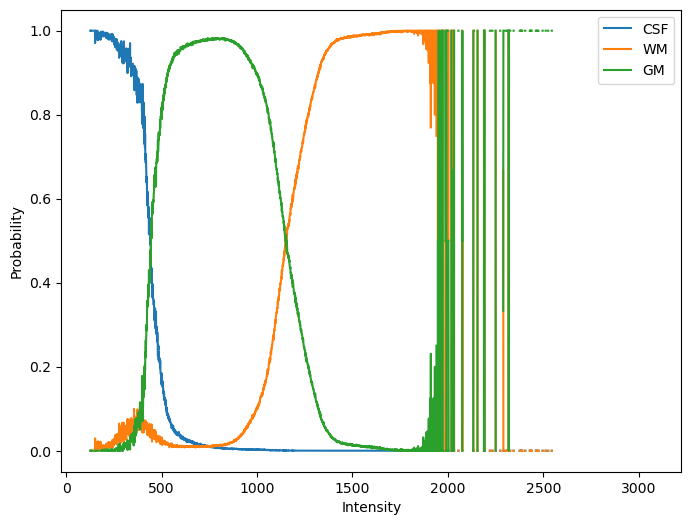

In [4]:
plt.figure(figsize=(8,6))
plt.plot(intensities,normalized_histogram_csf,label='CSF')
plt.plot(intensities,normalized_histogram_wm,label='WM')
plt.plot(intensities,normalized_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

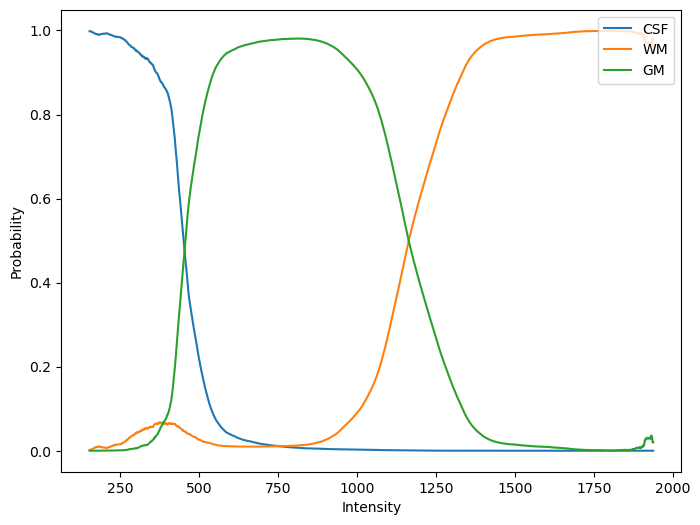

In [5]:
plt.figure(figsize=(8,6))
plt.plot(intensities,smoothed_histogram_csf,label='CSF')
plt.plot(intensities,smoothed_histogram_wm,label='WM')
plt.plot(intensities,smoothed_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

In [6]:
for i,j,k in zip(range(len(normalized_histogram_csf)), range(len(normalized_histogram_wm)), range(len(normalized_histogram_gm))):
  if np.isnan(normalized_histogram_csf[i]) == True: 
    normalized_histogram_csf[i] = epsilon
  if np.isnan(normalized_histogram_wm[j]) == True:
    normalized_histogram_wm[j] = epsilon
  if np.isnan(normalized_histogram_gm[k]) == True:
    normalized_histogram_gm[k] = epsilon 

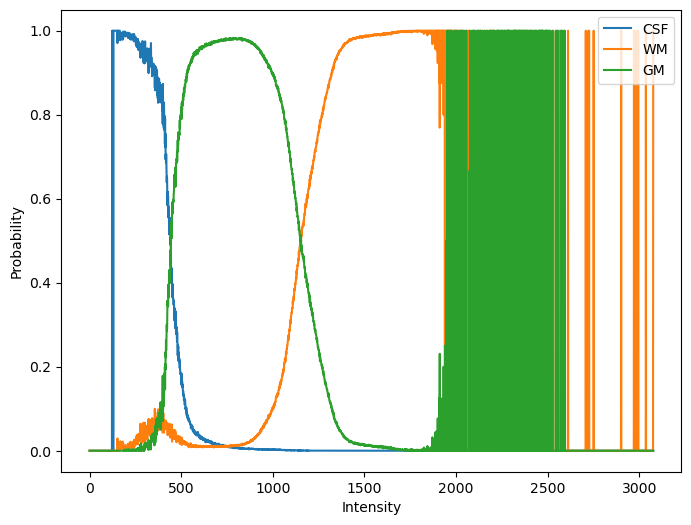

In [7]:
plt.figure(figsize=(8,6))
plt.plot(intensities,normalized_histogram_csf,label='CSF')
plt.plot(intensities,normalized_histogram_wm,label='WM')
plt.plot(intensities,normalized_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

In [8]:
for i,j,k in zip(range(len(smoothed_histogram_csf)), range(len(smoothed_histogram_wm)), range(len(smoothed_histogram_gm))):
  if np.isnan(smoothed_histogram_csf[i]) == True: 
    smoothed_histogram_csf[i] = epsilon
  if np.isnan(smoothed_histogram_wm[j]) == True:
    smoothed_histogram_wm[j] = epsilon
  if np.isnan(smoothed_histogram_gm[k]) == True:
    smoothed_histogram_gm[k] = epsilon 

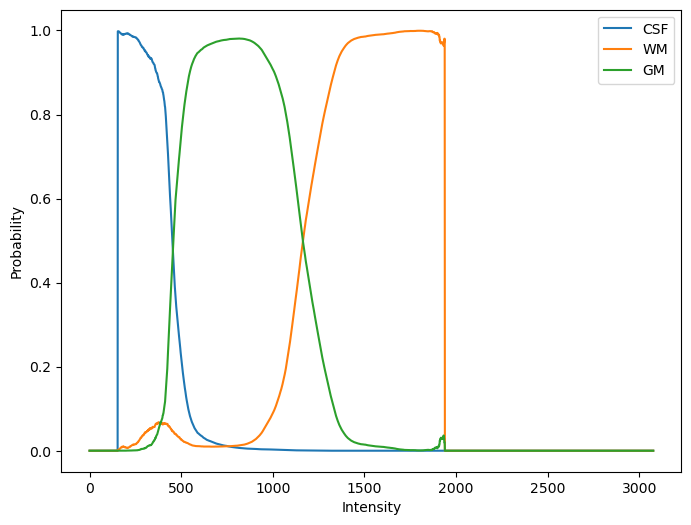

In [9]:
plt.figure(figsize=(8,6))
plt.plot(intensities,smoothed_histogram_csf,label='CSF')
plt.plot(intensities,smoothed_histogram_wm,label='WM')
plt.plot(intensities,smoothed_histogram_gm,label='GM')
plt.ylabel('Probability')
plt.xlabel('Intensity')
plt.legend(loc='upper right')

In [9]:
masked_images=[]
probabilities=[]
images=[]
masks=[]
labels=[]
for i in range(len(test_images)):
    image_read=nib.load(os.path.join(test_images_directory,test_images[i]))
    image_data= image_read.get_fdata()
    images.append(image_data)
    mask_read= nib.load(os.path.join(test_masks_directory,test_masks[i]))
    mask_data= mask_read.get_fdata()
    masks.append(mask_data)
    masked_image= image_data[mask_data>0]
    masked_images.append(masked_image)
    temp_prob=[]
    temp_labels=[]
    prob_csf= np.zeros(masked_image.shape)
    for k in masked_image:
        k = int(k)
        if k >= len(normalized_histogram_csf):
            k= len(normalized_histogram_csf)-1
        elif k >= len(normalized_histogram_gm): 
            k= len(normalized_histogram_gm) - 1
        elif k >= len(normalized_histogram_gm):
            k= len(normalized_histogram_gm) -1
        class_array=np.array([normalized_histogram_csf[k],normalized_histogram_wm[k],normalized_histogram_gm[k]])
        max_prob= np.amax(class_array)
        max_label= np.argmax(class_array)+1
        temp_prob.append(max_prob)
        temp_labels.append(max_label)
    probabilities.append(temp_prob)
    labels.append(temp_labels)


KeyboardInterrupt: 

In [71]:
tissue_models= np.vstack((normalized_histogram_csf,normalized_histogram_wm,normalized_histogram_gm))

In [72]:
lut= np.argmax(tissue_models,axis=0)+1
lut_probas= np.amax(tissue_models, axis=0)

In [73]:
max_number=[]
for i in range(len(test_images)):
    image_read=nib.load(os.path.join(test_images_directory,test_images[i]))
    image_data= image_read.get_fdata()
    image_data= image_data.astype(int)
    max_number.append(np.amax(image_data))
max_test_intensity = np.amax(max_number)


In [74]:
last_element_lut=lut[-1]
for i in range(max_test_intensity-len(lut)+1):
    lut= np.append(lut,last_element_lut)

In [75]:
last_element_lut_probas=lut_probas[-1]
for i in range(max_test_intensity-len(lut_probas)+1):
    lut_probas= np.append(lut_probas,last_element_lut_probas)

In [76]:
images=[]
segmented_images_csf=[]
segmented_images_wm=[]
segmented_images_gm=[]
images_probas=[]
label_images_csf=[]
label_images_wm=[]
label_images_gm=[]
dice_scores_csf=[]
dice_scores_wm=[]
dice_scores_gm=[]
for i in range(len(test_images)):
    image_read=nib.load(os.path.join(test_images_directory,test_images[i]))
    image_data= image_read.get_fdata()
    image_data= image_data.astype(int)
    images.append(image_data)
    mask_read= nib.load(os.path.join(test_masks_directory,test_masks[i]))
    mask_data= mask_read.get_fdata()
    label_read= nib.load(os.path.join(test_labels_directory,test_labels[i]))
    label_data= label_read.get_fdata()
    seg_img= lut[image_data]
    img_prob= lut_probas[image_data]
    images_probas.append(img_prob)
    seg_img= seg_img*mask_data
    seg_csf= (seg_img ==1)
    seg_wm= (seg_img==2)
    seg_gm= (seg_img==3)
    label_csf= (label_data==1)
    label_wm= (label_data==2)
    label_gm= (label_data==3)
    segmented_images_csf.append(seg_csf)
    segmented_images_wm.append(seg_wm)
    segmented_images_gm.append(seg_gm)
    label_images_csf.append(label_csf)
    label_images_wm.append(label_wm)
    label_images_gm.append(label_gm)
    ds_csf= dice(seg_csf, label_csf)
    ds_wm= dice(seg_wm, label_wm)
    ds_gm= dice(seg_gm, label_gm)
    dice_scores_csf.append(ds_csf)
    dice_scores_wm.append(ds_wm)
    dice_scores_gm.append(ds_gm)
    print("For Patient # ", i,"Image Name: ", os.path.join(test_images_directory,test_images[i])[-8:],"Dice Score CSF: ", ds_csf, "Dice Score WM: ", ds_wm, "Dice Score GM:", ds_gm)
    

For Patient #  0 Image Name:  1003.nii Dice Score CSF:  0.3399443284620738 Dice Score WM:  0.805005423622434 Dice Score GM: 0.8230791755828359
For Patient #  1 Image Name:  1004.nii Dice Score CSF:  0.6377349358715818 Dice Score WM:  0.923305234929701 Dice Score GM: 0.9475775001762534
For Patient #  2 Image Name:  1005.nii Dice Score CSF:  0.8728935497824034 Dice Score WM:  0.9189878320703501 Dice Score GM: 0.9456556605727746
For Patient #  3 Image Name:  1018.nii Dice Score CSF:  0.49372093023255814 Dice Score WM:  0.8844284686082424 Dice Score GM: 0.9087259688739701
For Patient #  4 Image Name:  1019.nii Dice Score CSF:  0.4422051965356429 Dice Score WM:  0.9182252349406871 Dice Score GM: 0.9498749357224661
For Patient #  5 Image Name:  1023.nii Dice Score CSF:  0.425563293732077 Dice Score WM:  0.8739520719661917 Dice Score GM: 0.8993048473486129
For Patient #  6 Image Name:  1024.nii Dice Score CSF:  0.5909677419354838 Dice Score WM:  0.8976054024856894 Dice Score GM: 0.92909306613

In [86]:
c=0
for i in images_probas:
    for k in i:
        for l in k:
            for j in l:
                if j>1.0:
                    c+=1
print(c)


0


In [37]:
# Id's of the given images
data_list = ['1003', '1004', '1005', '1018', '1019', '1023', '1024', '1025',
            '1038', '1039', '1101', '1104', '1107', '1110', '1113', '1116',
            '1119', '1122', '1125', '1128'] 

#Important directories for OS Operation
parent_directory2= "C:\\MISA\\Lab3\\"
elastix_directory2 = os.path.join(parent_directory2,'elastix')
atlas_directory2 = os.path.join(parent_directory2,'atlas\\')
input_img_directory2 = os.path.join(parent_directory2,'testing-images\\')
output_directory2 = os.path.join(parent_directory2,'outputs\\')
mni_output_directory2 = os.path.join(parent_directory2,'mni_outputs\\')

input_lbl_directory2 = os.path.join(parent_directory2, 'testing-labels\\')

parameter_affine_directory2 = os.path.join(parent_directory2, 'ParametersPar0009affine.txt')
parameter_elastic_directory2 = os.path.join(parent_directory2, 'ParametersPar0009elastic.txt' )

In [35]:
# Block for generating Image Registration of atlas for each fixed image
# Getting the names for each image
for fixed in data_list:

    #temporary output directory for fixed image 
    current_output_directory = output_directory2 + fixed + '\\'
    #print(current_output_directory)
    
    # Location for the fixed image
    current_fixed_directory = input_img_directory2 + fixed + '.nii'
    #print(current_fixed_directory)
    
    # Atlas directory and intensity atlas
    current_moving_directory = atlas_directory2 + 'intensity_atlas.nii'
    #print(current_moving_directory)
   

    # Generating Image Registration for all the fixed images (Run Once)
    os.system("cd /d C: && cd "+elastix_directory2+"&& elastix -f "+current_fixed_directory+" -m "+current_moving_directory+" -out "+current_output_directory+" -p "+parameter_affine_directory2+" -p "+parameter_elastic_directory2+"")

In [41]:
# Label transformation for Probabilistic Atlas
csf_prob_atlas_directory = os.path.join(atlas_directory2,'probabilistic_atlas_csf.nii')
wm_prob_atlas_directory = os.path.join(atlas_directory2, 'probabilistic_atlas_wm')
gm_prob_atlas_directory = os.path.join(atlas_directory2, 'probabilistic_atlas_gm')

# Locations for the deformation field and outputs
parameter_directory = output_directory2

for data in data_list:
    # The final transformation matrix generated after Image Registration
    current_parameter_directory = parameter_directory + data + '\\TransformParameters.1.txt'
    
    current_output_directory = parameter_directory + data
    current_csf_output_directory = current_output_directory + '\\csf\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    os.system("cd /d C: && cd "+elastix_directory2+"&& transformix -in "+csf_prob_atlas_directory+" -out "+current_csf_output_directory+" -tp "+current_parameter_directory+"")
    current_wm_output_directory = current_output_directory + '\\wm\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    os.system("cd /d C: && cd "+elastix_directory2+"&& transformix -in "+wm_prob_atlas_directory+" -out "+current_wm_output_directory+" -tp "+current_parameter_directory+"")
    current_gm_output_directory = current_output_directory + '\\gm\\'
    # Transform the labels too using the matrix generated after image registration (Run Once)
    os.system("cd /d C: && cd "+elastix_directory2+"&& transformix -in "+gm_prob_atlas_directory+" -out "+current_gm_output_directory+" -tp "+current_parameter_directory+"")

In [101]:

maps=[]
for data in data_list: 
    current_output_directory = parameter_directory + data
    current_csf_output_directory = os.path.join(current_output_directory,'csf\\result.nii')
    current_wm_output_directory = os.path.join(current_output_directory,'wm\\result.nii')
    current_gm_output_directory = os.path.join(current_output_directory, 'gm\\result.nii')
    csf_read=nib.load(current_csf_output_directory)
    csf_data= csf_read.get_fdata()
    wm_read=nib.load(current_wm_output_directory)
    wm_data= csf_read.get_fdata()
    gm_read=nib.load(current_gm_output_directory)
    gm_data= csf_read.get_fdata()
    map= np.stack((csf_data,wm_data,gm_data),axis=-1)
    maps.append(map)
    

    

In [109]:
lut_labelprop=[]
lut_proba_labelprop=[]
for m in maps: 
    lut_labelprop.append(np.argmax(m,axis=3)+1)
    lut_proba_labelprop.append(np.amax(m, axis=3))



MemoryError: Unable to allocate 468. MiB for an array with shape (256, 312, 256, 3) and data type float64

In [168]:
#patients_list=[]
#for i in range(len(test_images)):
#    patient= np.zeros(images[i].shape)
#    for k in masked_images[i]:
#        k= int(k)
#        indices= np.asarray(images[i] == int(masked_images[i][k])).nonzero()
#        #indices = np.where(images[i] == int(masked_images[i][k]))
#        for x,y,z in zip(indices[0], indices[1], indices[2]):
#            patient[x,y,z] = labels[i][k]
#    patients_list.append(patient)


KeyboardInterrupt: 